# Red Wind Quality - Visualization


## Mục lục

1. [Giới thiệu](#1-gioi-thieu)
2. [Import thư viện và load tập dữ liệu](#2-import-thư-viện-và-load-tập-dữ-liệu)
3. [Phân tích phân phối các đặc trưng](#3-phân-tích-phân-phối-các-đặc-trưng)
4. [Trực quan hóa phân phối biến mục tiêu](#4-trực-quan-hóa-phân-phối-biến-mục-tiêu)
5. [Phân tích mối quan hệ giữa các đặc trưng](#5-phân-tích-mối-quan-hệ-giữa-các-đặc-trưng)
6. [So sánh phân phối giữa các nhóm chất lượng](#6-so-sánh-phân-phối-giữa-các-nhóm-chất-lượng)


## 1. Giới thiệu

Bộ dữ liệu "Wine Quality" chứa thông tin hóa học và cảm quan của 1.599 mẫu rượu vang đỏ, với 11 đặc trưng đầu vào (như độ axit, lượng đường dư, nồng độ cồn, v.v.) và một nhãn mục tiêu là điểm chất lượng (quality) được đánh giá theo thang điểm từ 3 đến 8. Mục tiêu của phân tích này là khám phá, trực quan hóa và hiểu rõ hơn về các yếu tố ảnh hưởng đến chất lượng rượu vang đỏ, từ đó hỗ trợ các quyết định trong sản xuất và kiểm soát chất lượng rượu vang. Các bước thực hiện bao gồm: thống kê mô tả, phân tích phân phối, phát hiện ngoại lệ, và trực quan hóa mối quan hệ giữa các đặc trưng với chất lượng rượu.

## 2. Import thư viện và load tập dữ liệu

Trong phần này, chúng ta sẽ import các thư viện cần thiết (pandas, numpy, matplotlib, seaborn) và đọc dữ liệu từ file `winequality-red.csv` vào DataFrame để chuẩn bị cho các bước phân tích tiếp theo.

In [9]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('winequality-red.csv')

# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Dựa trên mô tả trong file dữ liệu, bộ dữ liệu gồm 11 biến đầu vào và 1 biến đầu ra.

#### Các biến đầu vào:
- **Fixed acidity (Độ axit cố định)**: hầu hết các loại axit có trong rượu vang là axit cố định hoặc không bay hơi
- **Volatile acidity (Độ axit bay hơi)**: lượng axit axetic trong rượu vang, nếu quá cao sẽ tạo vị giấm khó chịu
- **Citric acid (Axit citric)**: có mặt với lượng nhỏ, axit citric giúp tăng vị tươi mới và hương vị cho rượu
- **Residual sugar (Đường dư)**: lượng đường còn lại sau khi lên men kết thúc, rượu có trên 45 gram/lít được coi là ngọt
- **Chlorides (Hàm lượng muối)**: lượng muối có trong rượu vang
- **Free sulfur dioxide (SO2 tự do)**: dạng tự do của SO2 tồn tại ở trạng thái cân bằng giữa SO2 phân tử (dạng khí hòa tan) và ion bisulfit; giúp ngăn ngừa vi sinh vật phát triển và quá trình oxy hóa rượu
- **Total sulfur dioxide (Tổng SO2)**: tổng lượng SO2 tự do và liên kết; ở nồng độ thấp, SO2 hầu như không cảm nhận được, nhưng trên 50 ppm thì có thể nhận thấy qua mùi và vị
- **Density (Khối lượng riêng)**: khối lượng riêng của rượu gần bằng nước, phụ thuộc vào hàm lượng cồn và đường
- **pH**: chỉ số đo độ axit hoặc bazơ của rượu trên thang từ 0 (rất axit) đến 14 (rất bazơ); hầu hết rượu vang có pH từ 3-4
- **Sulphates (Sunphat)**: chất phụ gia có thể tạo ra khí SO2, đóng vai trò kháng khuẩn và chống oxy hóa
- **Alcohol (Nồng độ cồn)**: phần trăm nồng độ cồn trong rượu vang

#### Biến đầu ra:
- **Quality (Chất lượng)**: biến đầu ra (dựa trên dữ liệu cảm quan, điểm số từ 0 đến 10)

## 3. Phân tích phân phối các đặc trưng

Phân tích phân phối của từng đặc trưng (feature) để kiểm tra skewness, kurtosis, missing values, và xác định outliers.

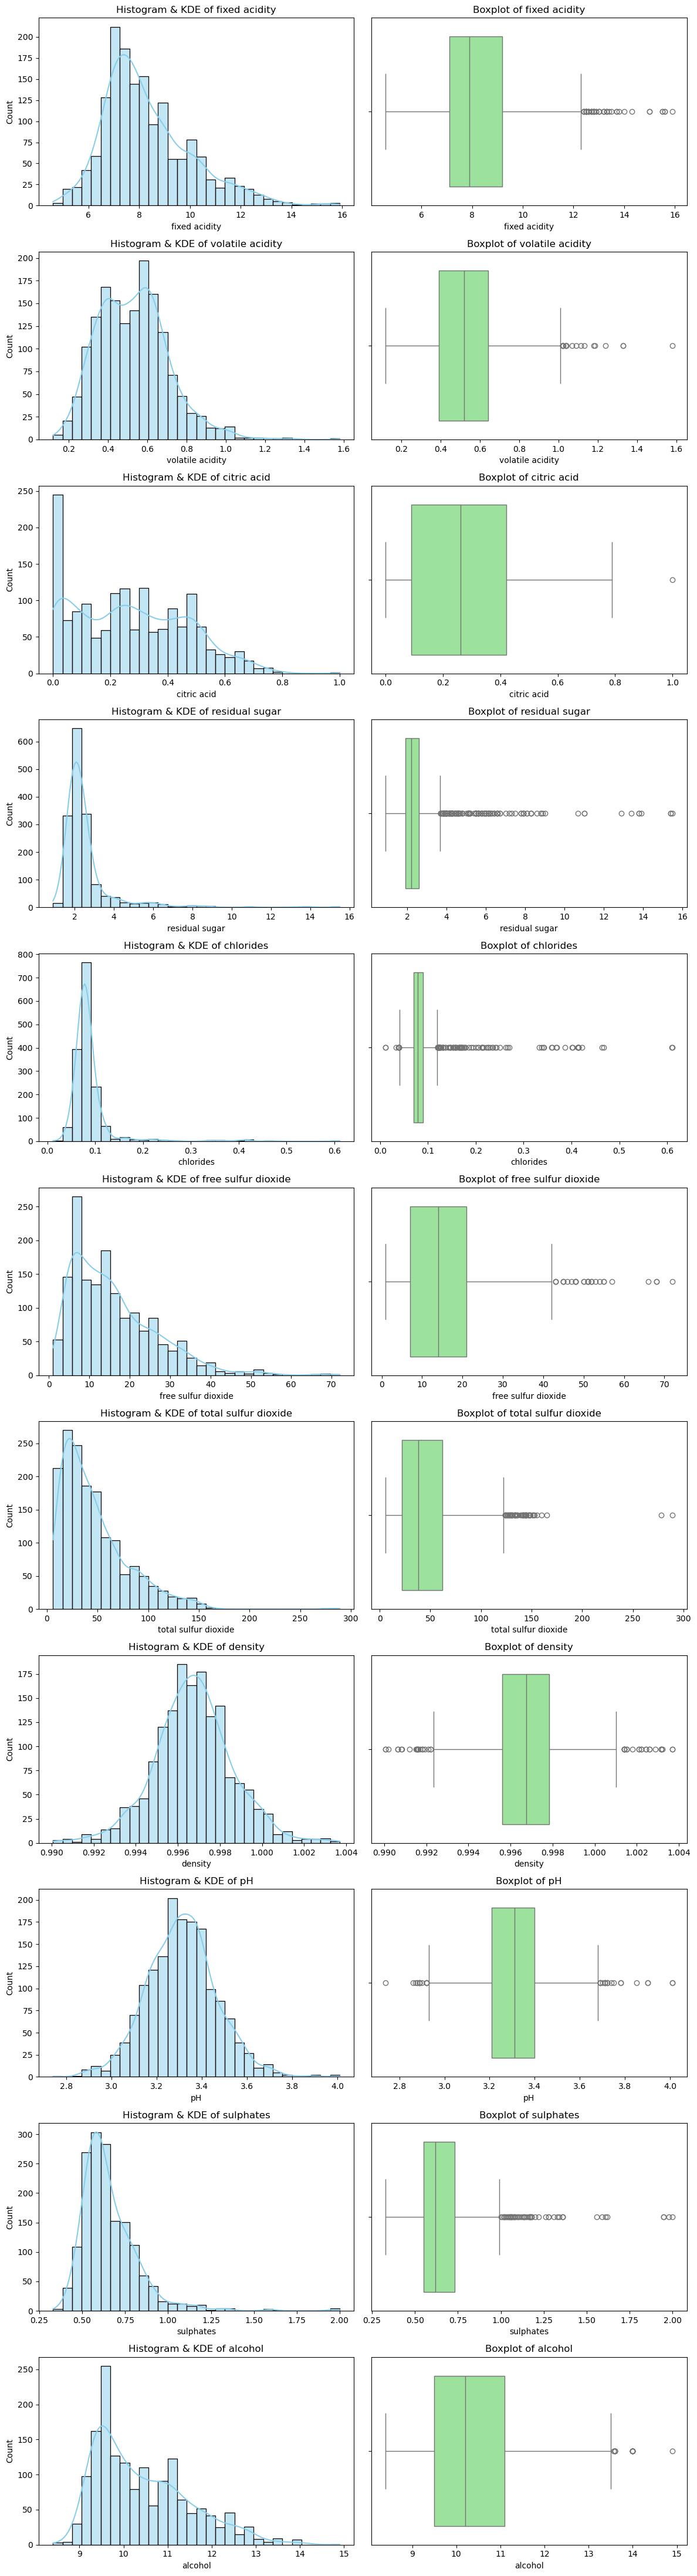

In [11]:
# Danh sách các đặc trưng số
num_features = df.select_dtypes(include=[np.number]).columns.drop('quality')

# Histogram & KDE plot cho từng đặc trưng
fig, axes = plt.subplots(len(num_features), 2, figsize=(12, 4*len(num_features)))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i,0], color='skyblue')
    axes[i,0].set_title(f'Histogram & KDE of {feature}')
    sns.boxplot(x=df[feature], ax=axes[i,1], color='lightgreen')
    axes[i,1].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [13]:
# # Violin plot cho từng đặc trưng theo nhóm quality
# fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 4*len(num_features)))
# for i, feature in enumerate(num_features):
#     sns.violinplot(x='quality', y=feature, data=df, ax=axes[i], palette='Set2')
#     axes[i].set_title(f'Violin plot of {feature} by Quality')
# plt.tight_layout()
# plt.show()

## 4. Trực quan hóa phân phối biến mục tiêu

Trực quan hóa phân phối của nhãn mục tiêu 'quality' 

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\4145747984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set1')


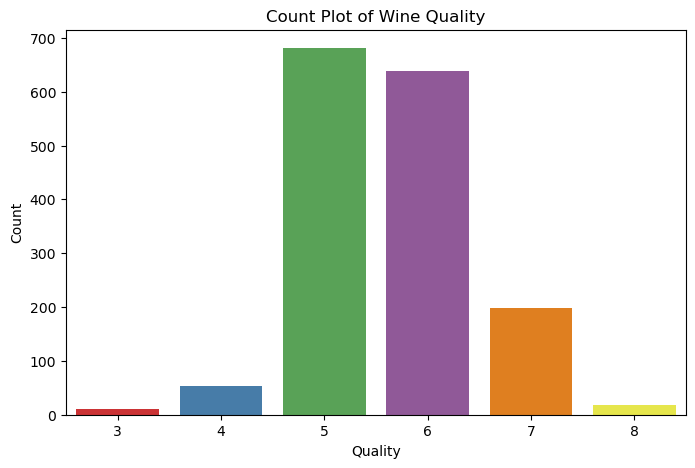

In [7]:
# Count plot cho quality
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='Set1')
plt.title('Count Plot of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## 5. Phân tích mối quan hệ giữa các đặc trưng

Phân tích mối quan hệ giữa các đặc trưng và với nhãn mục tiêu

In [14]:
# # Scatter plot: alcohol vs. quality
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality', palette='viridis')
# plt.title('Scatter Plot: Alcohol vs. Quality')
# plt.show()

In [17]:
# # Pair plot cho tất cả numerical features, hue theo quality
# sns.pairplot(df, hue='quality', diag_kind='hist', palette='tab10')
# plt.suptitle('Pair Plot of Numerical Features', y=1.02)
# plt.show()

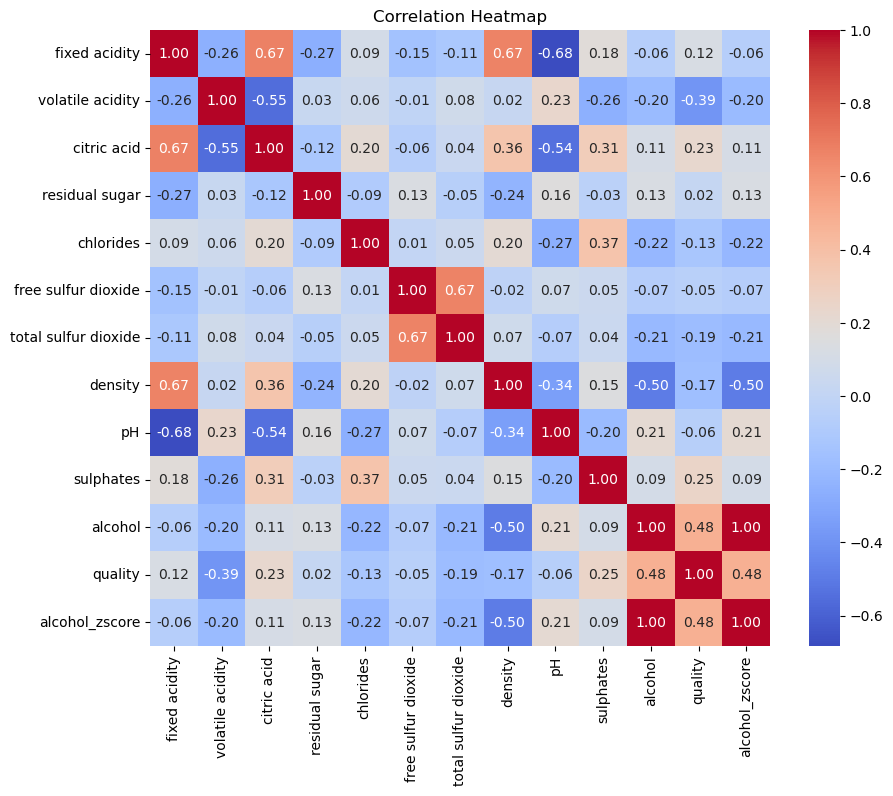

In [27]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 6. So sánh phân phối giữa các nhóm chất lượng

So sánh phân phối các đặc trưng giữa các nhóm quality 

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\2639845331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=df, palette='Set2')


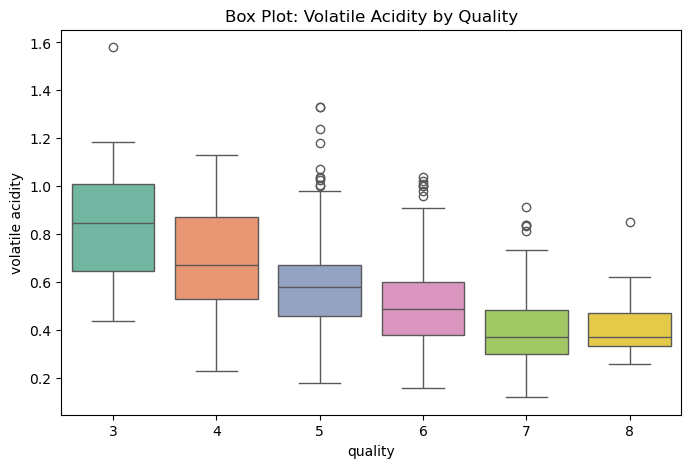

In [13]:
# Grouped box plot: volatile acidity theo quality
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='Set2')
plt.title('Box Plot: Volatile Acidity by Quality')
plt.show()

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\1430229752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='citric acid', data=df, palette='Set3')


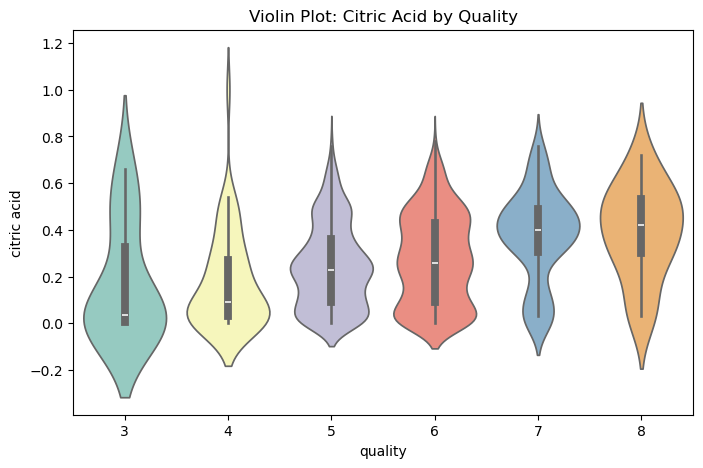

In [14]:
# Grouped violin plot: citric acid theo quality
plt.figure(figsize=(8,5))
sns.violinplot(x='quality', y='citric acid', data=df, palette='Set3')
plt.title('Violin Plot: Citric Acid by Quality')
plt.show()

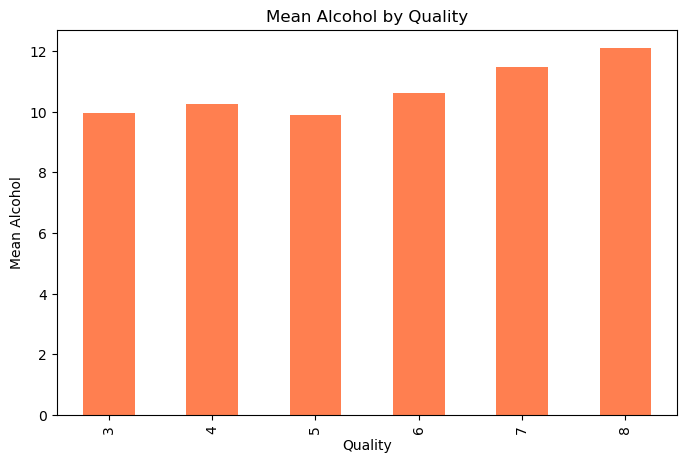

In [15]:
# Bar plot: mean alcohol theo quality
plt.figure(figsize=(8,5))
df.groupby('quality')['alcohol'].mean().plot(kind='bar', color='coral')
plt.title('Mean Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Mean Alcohol')
plt.show()

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\4050927577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='quality', y='chlorides', data=df, palette='Set1', size=3)
c:\Users\ThaiTu\AppData\Local\Programs\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ThaiTu\AppData\Local\Programs\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ThaiTu\AppData\Local\Programs\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the s

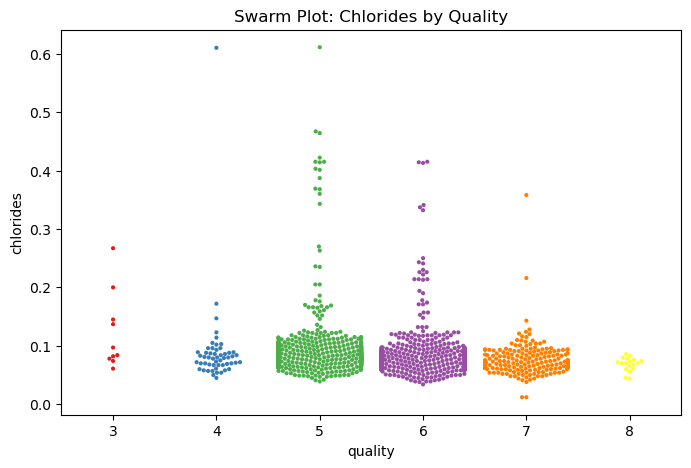

In [16]:
# Swarm plot: chlorides theo quality
plt.figure(figsize=(8,5))
sns.swarmplot(x='quality', y='chlorides', data=df, palette='Set1', size=3)
plt.title('Swarm Plot: Chlorides by Quality')
plt.show()